# Notebook 4: Final Trade Summary + Risk Checks

## 1. Final structure and cost  
## 2. Payoff diagram and breakeven  
## 3. Expected value under simulated Q distribution  
## 4. Limitations and robustness notes


In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Project root added:", PROJECT_ROOT)


Project root added: c:\Users\nicho\tariff-options-strategy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.tariff_strategy.trading.trade_summary import (
    put_spread_metrics,
    put_spread_payoff_dollars,
)


In [4]:
best = pd.read_csv("data/notebook3_best_put_spread.csv").iloc[0]

K_LONG = float(best["K_long"])
K_SHORT = float(best["K_short"])
PREMIUM_PAID = float(best["cost"])  # already dollars
EXPIRY = best["chosen_expiry"]
S0 = float(best["S0"])

print("Chosen expiry:", EXPIRY)
print(f"Spread: long {K_LONG:.0f} put / short {K_SHORT:.0f} put")
print(f"Premium paid: ${PREMIUM_PAID:.2f}")
print(f"S0 at build time: {S0:.2f}")


Chosen expiry: 2026-02-13
Spread: long 385 put / short 350 put
Premium paid: $577.00
S0 at build time: 400.39


In [5]:
metrics = put_spread_metrics(K_LONG, K_SHORT, PREMIUM_PAID)
pd.DataFrame([metrics])


,width_$,premium_$,max_profit_$,max_loss_$,breakeven
0,3500.0,577.0,2923.0,577.0,379.23


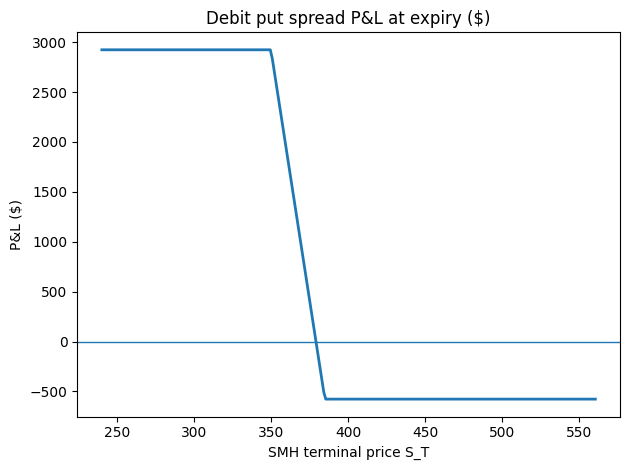

In [6]:
S_grid = np.linspace(0.60 * S0, 1.40 * S0, 250)
pnl = put_spread_payoff_dollars(S_grid, K_LONG, K_SHORT, PREMIUM_PAID)

plt.figure()
plt.plot(S_grid, pnl, linewidth=2)
plt.axhline(0, linewidth=1)
plt.title("Debit put spread P&L at expiry ($)")
plt.xlabel("SMH terminal price S_T")
plt.ylabel("P&L ($)")
plt.tight_layout()
plt.show()


In [7]:
sims = pd.read_csv("data/notebook2_smh_terminal_distribution.csv")
st = sims["S_T"].to_numpy(dtype=float)

pnl_sims = put_spread_payoff_dollars(st, K_LONG, K_SHORT, PREMIUM_PAID)

ev = pnl_sims.mean()
p_profit = (pnl_sims > 0).mean()

print(f"EV (mean P&L): ${ev:.2f}")
print(f"P(P&L > 0): {p_profit:.2%}")


EV (mean P&L): $87.28
P(P&L > 0): 25.17%


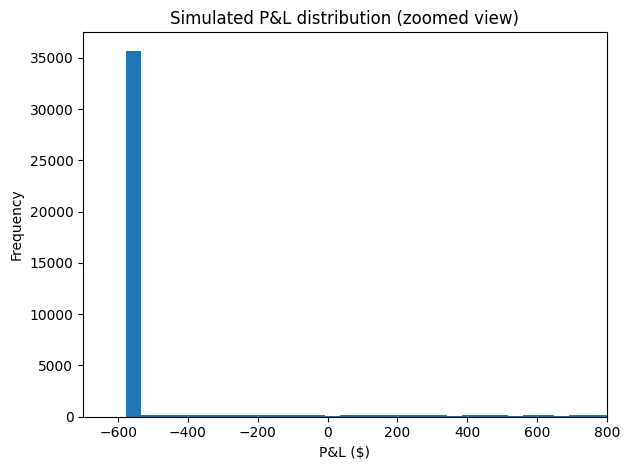

In [10]:
plt.figure()
plt.hist(pnl_sims, bins=80)
plt.xlim(-700, 800)  # zoom in to see the middle outcomes
plt.title("Simulated P&L distribution (zoomed view)")
plt.xlabel("P&L ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [9]:
from pathlib import Path

DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

out = sims.copy()
out["pnl_$"] = pnl_sims
out.to_csv(DATA_DIR / "notebook4_simulated_pnl.csv", index=False)

summary = pd.DataFrame([{
    "expiry": EXPIRY,
    "K_long": K_LONG,
    "K_short": K_SHORT,
    "premium_$": PREMIUM_PAID,
    "max_loss_$": metrics["max_loss_$"],
    "max_profit_$": metrics["max_profit_$"],
    "breakeven": metrics["breakeven"],
    "EV_$": ev,
    "P_profit": p_profit,
}])
summary.to_csv(DATA_DIR / "notebook4_trade_summary.csv", index=False)

print("Saved:")
print("-", DATA_DIR / "notebook4_simulated_pnl.csv")
print("-", DATA_DIR / "notebook4_trade_summary.csv")


Saved:
- data\notebook4_simulated_pnl.csv
- data\notebook4_trade_summary.csv
